In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%run './functions_needed.ipynb'
df_main = pd.read_csv('/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.06.22_AhS_PAPER_COHORT_ref/basket_scores_4th_gen.tsv',sep='\t')
meta_data = pd.read_csv('/media/kusterlab/internal_projects/active/TOPAS/WP31/Searches/patient_annotation_paper_cohort_230626_final.csv')
df_main = df_main.set_index("Sample").T

patinet_regex= r'(^\S+-.+-\S)'

# For the patients

In [2]:
patients_list = meta_data['Sample name'][meta_data['Batch Name'] < 73].tolist()
patients_list = [x for x in patients_list if x not in meta_data['Sample name'][meta_data['Batch Name'] == 16].tolist()]
df = df_main[patients_list]
df['Proteins_names'] = df.index
melted_df = pd.melt(df,id_vars=['Proteins_names'],value_name='value',var_name='variable')
cv_df_patients = get_cv_from_melted_df(melted_df)
cv_df_patients.columns = ['std_patients','mean_patients','cv_patients','Gene names']

/tmp/ipykernel_515333/3026546880.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Proteins_names'] = df.index


# For the ref channels

In [3]:
df = df_main.filter(regex='^Reporter intensity corrected 9|^Reporter intensity corrected 10|^Reporter intensity corrected 11')
df = df.loc[:,~df.columns.str.contains('Batch16')] # batch 16 was removed as
df['Proteins_names'] = df.index
melted_df = pd.melt(df,id_vars=['Proteins_names'],value_name='value',var_name='variable')
melted_df["Batch_name"] = melted_df.variable.apply(lambda x:x.split('_')[1])
melted_df['Batch_name'] = melted_df.Batch_name.str.replace("Batch",'')
melted_df.Batch_name = melted_df.Batch_name.astype('int')
melted_df = melted_df[melted_df.Batch_name < 73]
cv_df = get_cv_from_melted_df(melted_df)

In [4]:
all_cvs = cv_df.merge(cv_df_patients,on='Gene names')

In [7]:
all_cvs.to_excel('/home/amir/Desktop/CVs_TUPAC_scores.xlsx')

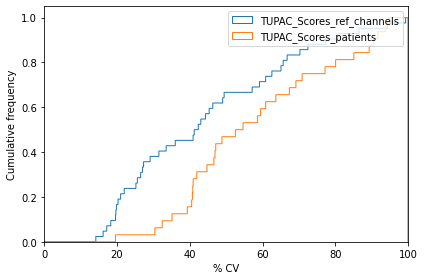

In [6]:
plt.hist(all_cvs['cv']*100, cumulative=True, bins=np.linspace(0,100,1000), histtype='step', density=True, label='TUPAC_Scores_ref_channels')
plt.hist(all_cvs['cv_patients']*100, cumulative=True, bins=np.linspace(0,100,1000), histtype='step', density=True, label='TUPAC_Scores_patients')
plt.legend()
plt.xlim([0, 100])
plt.xlabel('% CV')
plt.ylabel('Cumulative frequency')
plt.tight_layout()
plt.savefig('/home/amir/Desktop/CV_TOPAC_scors_ref_channels.svg',dpi=300)
